In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('1212.csv')

In [3]:
dataframe

,Unnamed: 0,id,conversation_id,created_at,date,timezone,tweet,language,hashtags,cashtags,...,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,reply_to,counts,Unnamed: 28
0,0.0,1.540000e+18,1.540000e+18,1.660000e+12,6/23/2022 13:58,300.0,#SME &amp; startups have closed due 2 #taxdema...,en,"['sme', 'taxdemands', 'cancelldebtke', 'embrac...",[],...,https://pbs.twimg.com/media/FV7qYzZXEAIs3o8.jpg,False,13.0,7.0,12.0,NaN,lang:en #SME,[],4.0,NaN
1,1.0,1.540000e+18,1.540000e+18,1.660000e+12,6/18/2022 18:47,300.0,$QNT &amp; $XDC GREEN ASCENSION ⬆️ #trade...,en,"['tradefinance', 'sme', 'interoperability', 'f...","['qnt', 'xdc']",...,https://pbs.twimg.com/media/FVi8iH3WIAAin19.jpg,False,182.0,11.0,33.0,NaN,lang:en #SME,[],5.0,NaN
2,2.0,1.540000e+18,1.540000e+18,1.660000e+12,6/13/2022 12:39,300.0,First release of #CryptoIso20022Interop is out...,en,"['cryptoiso20022interop', 'sme', 'xrp', 'iso20...",[],...,https://pbs.twimg.com/media/FVH35sZWQAAaYTG.jpg,False,249.0,11.0,84.0,NaN,lang:en #SME,[],8.0,NaN
3,3.0,1.530000e+18,1.530000e+18,1.650000e+12,6/8/2022 4:15,300.0,"For maths I was Donna-lee, for English Lit I w...",en,"['sme', 'jmmb']",[],...,https://pbs.twimg.com/ext_tw_video_thumb/15343...,False,529.0,42.0,51.0,NaN,lang:en #SME,[],2.0,NaN
4,4.0,1.500000e+18,1.500000e+18,1.650000e+12,3/4/2022 10:14,300.0,Hi I am currently looking for web expert inter...,en,"['sme', 'bizbazaar', 'entrepreneursmarket', 'i...",[],...,NaN,False,24.0,11.0,33.0,NaN,lang:en #SME,[],4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
new = pd.DataFrame(zip(dataframe.nlikes, dataframe.nretweets, dataframe.nreplies, dataframe.video, dataframe.photos))

In [5]:
new

,0,1,2,3,4
0,13.0,12.0,7.0,1.0,1.0
1,182.0,33.0,11.0,1.0,1.0
2,249.0,84.0,11.0,1.0,1.0
3,529.0,51.0,42.0,1.0,0.0
4,24.0,33.0,11.0,0.0,0.0
...,...,...,...,...,...
118,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN


In [6]:
dataframe = pd.read_csv('15.csv')

In [7]:
dataframe

,nlikes,nretweets,nreplies,video,photos
0,13,12,7,1,1
1,182,33,11,1,1
2,249,84,11,1,1
3,529,51,42,1,0
4,24,33,11,0,0
...,...,...,...,...,...
101,55,22,42,1,1
102,188,29,9,0,0
103,72,49,12,1,0
104,108,10,19,0,0


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Importing the dataset
X = dataframe.iloc[:, [0, 1, 4]].values
y = dataframe.iloc[:,3].values

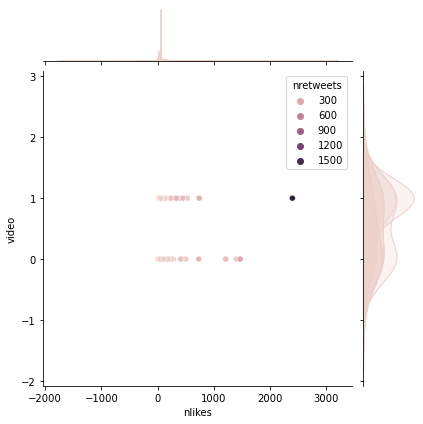

In [10]:
sns.jointplot(x='nlikes',y='video',data=dataframe,hue='nretweets', kind= 'scatter');


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric= 'correlation', p = 3)
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='correlation', n_neighbors=4, p=3)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_pred


array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [18]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [20]:
cm

array([[ 9,  0],
       [ 2, 11]], dtype=int64)

In [21]:
ac

0.9090909090909091